## Question 1

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate


In [147]:
# Define the given data
time_stamp = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
values = np.array([0, 2.904619134, 0.88037342, 23.676904, 26.353033, 34.62067057,
                   32.93007063, 61.12414349, 74.04210278, 108.0654311, 141.1581919,
                   170.8030216, 195.0793579, 218.3506352, 273.3951242])


In [148]:
# Define least squares estimate function
def least_squares_estimate(phi, y):
    theta = np.linalg.lstsq(phi, y, rcond=None)[0]
    return theta

# Define phi
def create_phi(time_stamp, n):
    phi = np.vander(time_stamp, n, increasing=True)
    return phi

Estimated parameters for n=1: [90.89224526]



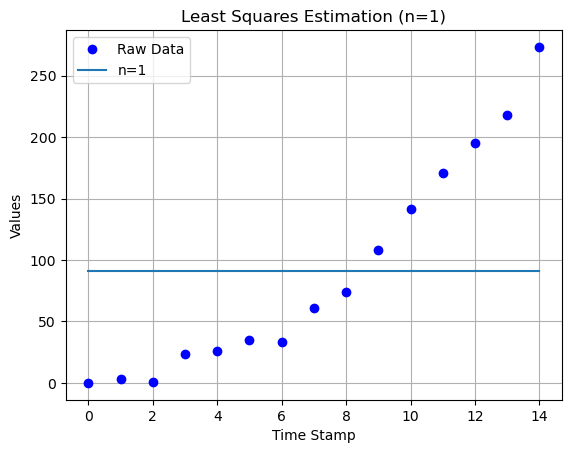

Estimated parameters for n=2: [-41.56671445  18.92270853]



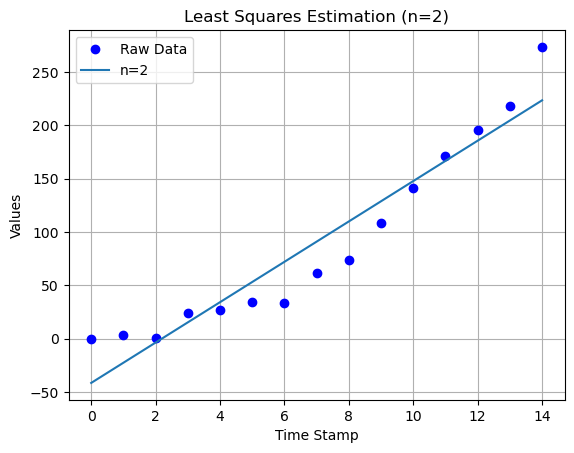

Estimated parameters for n=3: [ 3.34292721 -1.80481839  1.48053764]



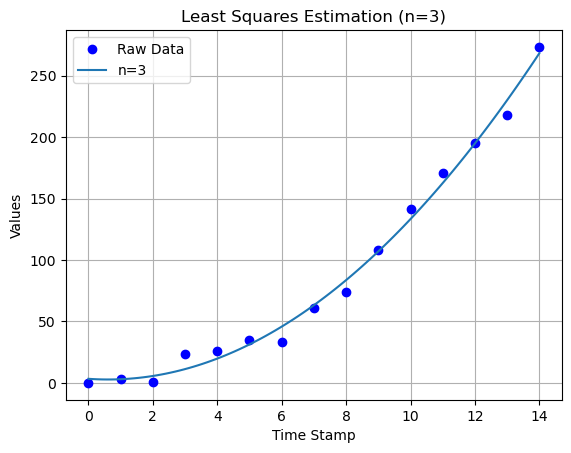

Estimated parameters for n=4: [ 1.88449686 -0.28762345  1.20007026  0.01335559]



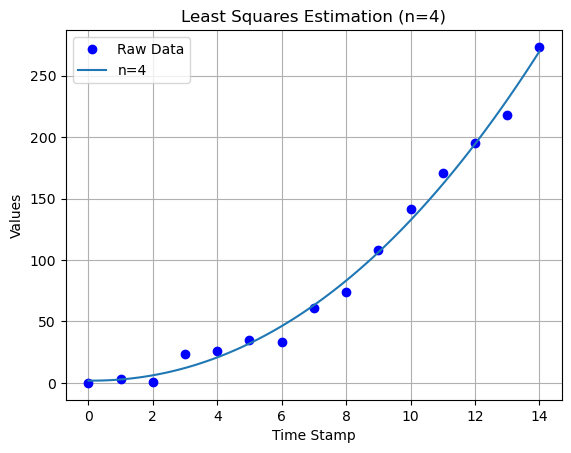

Estimated parameters for n=5: [-1.47608676  6.66463289 -1.2157339   0.28752908 -0.00979191]



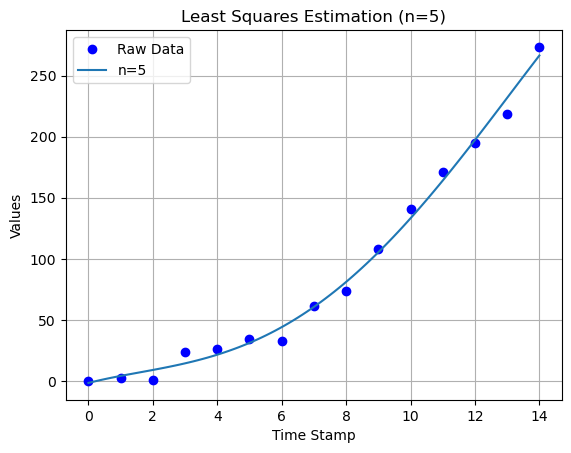

In [149]:
# Calculate the least squares estimate for different lengths
estimates = []
losses = []
results = []
for n in range(1, 6):
    phi = create_phi(time_stamp, n)
    theta = least_squares_estimate(phi, values)
    estimates.append(theta)
    y_pred = np.dot(phi, theta)
    loss = 0.5 * np.sum((values - y_pred) ** 2)
    losses.append(loss)

    # Print the estimated parameters for the case
    print(f"Estimated parameters for n={n}: {theta}\n")

    # Plot the raw data and the curve
    plt.figure()
    plt.plot(time_stamp, values, 'bo', label='Raw Data')
    x = np.linspace(0, 14, 100)
    phi = create_phi(x, n)
    y = np.dot(phi, theta)
    plt.plot(x, y, label=f'n={n}')
    plt.xlabel('Time Stamp')
    plt.ylabel('Values')
    plt.legend()
    plt.title(f'Least Squares Estimation (n={n})')
    plt.grid(True)
    plt.show()
    
    # Append the results to the table
    result = [f"Model {n}"] + list(theta) + [loss]
    results.append(result)

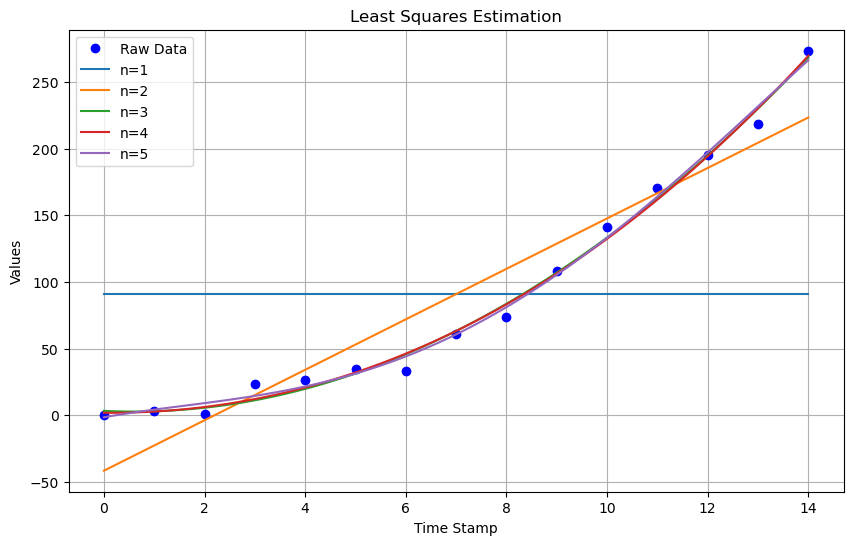

In [150]:
# Plot the raw data and the curves
plt.figure(figsize=(10, 6))
plt.plot(time_stamp, values, 'bo', label='Raw Data')
x = np.linspace(0, 14, 100)
for n, theta in enumerate(estimates):
    phi = create_phi(x, n+1)
    y = np.dot(phi, theta)
    plt.plot(x, y, label=f'n={n+1}')

plt.xlabel('Time Stamp')
plt.ylabel('Values')
plt.legend()
plt.title('Least Squares Estimation')
plt.grid(True)
plt.show()

In [151]:
# Print the losses for each case
for n, loss in enumerate(losses):
    print(f"Loss for n={n+1}: {loss}")

Loss for n=1: 55049.9774943533
Loss for n=2: 4920.331756760634
Loss for n=3: 398.983554464405
Loss for n=4: 393.87470177292397
Loss for n=5: 357.43306630364526


In [152]:
# Calculate the least squares estimate for different lengths
results = []
for n in range(1, 6):
    phi = create_phi(time_stamp, n)
    theta = least_squares_estimate(phi, values)
    y_pred = np.dot(phi, theta)

    # Check if the result exists
    if len(theta) < 5:
        theta = np.append(theta, ['-'] * (5 - len(theta)))
    loss = 0.5 * np.sum((values - y_pred) ** 2)

    # Append the results to the table
    result = [f"Model {n}"] + list(theta) + ["-" if len(theta) < 5 else loss]
    results.append(result)

# Define the column headers
headers = ["Model", "b0", "b1", "b2", "b3", "b4", "Loss"]

# Display the table
table = tabulate(results, headers, tablefmt="pipe")
print(table)


| Model   |        b0 | b1                  | b2                  | b3                   | b4                   |      Loss |
|:--------|----------:|:--------------------|:--------------------|:---------------------|:---------------------|----------:|
| Model 1 |  90.8922  | -                   | -                   | -                    | -                    | 55050     |
| Model 2 | -41.5667  | 18.922708530378575  | -                   | -                    | -                    |  4920.33  |
| Model 3 |   3.34293 | -1.804818388284308  | 1.48053763704735    | -                    | -                    |   398.984 |
| Model 4 |   1.8845  | -0.2876234540058155 | 1.2000702636331906  | 0.013355589210197968 | -                    |   393.875 |
| Model 5 |  -1.47609 | 6.664632886791497   | -1.2157339014692568 | 0.28752907870648853  | -0.00979191033915468 |   357.433 |


In [198]:
def least_mean_square_estimate(time_stamp, y, n, adapting_rate=0.00019):
    error = np.zeros(len(time_stamp))
    theta = np.zeros(n)

    for i in range(len(time_stamp)):
        regressors = np.array([time_stamp[i]**j for j in range(n)]).flatten()
        y_h = np.dot(regressors, theta)
        error[i] = y[i] - y_h
        theta = theta + adapting_rate * regressors * error[i]

    loss = np.mean(error**2)
    return theta, loss

theta, loss = least_mean_square_estimate(time_stamp, values, 3)
print(f"Model {3} Loss: {loss}")



Model 3 Loss: 377.66291319639697
